In [1]:
### import necessary librarys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt


__Some preliminary questions I am curious about:__

_Are the number of dog bites increasing, decreasing, or staying the same?_

_And how does that compare to the number of dogs or rate of dog ownership in the US?_

_Are you more likely to be bitten by a male dog or a female dog?_

_Are dog bites concentrated in certain geographic areas?_

_Which breed of dog are you most likely to be bitten by?_

_I once lived in an apartment where certain dogs were not allowed.  Are they actually a greater risk for biting people?_

_Are pit bulls more likely to bite people than other dog breeds?_

_What are the chances you will get rabies from a dog bites?_



In [2]:
### Read in data set of animal bites
raw_df=pd.read_csv('Health_AnimalBites.csv')

In [3]:
raw_df

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_df.value_counts('SpeciesIDDesc')

SpeciesIDDesc
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
dtype: int64

In [5]:
raw_df.value_counts('ResultsIDDesc')

ResultsIDDesc
UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
dtype: int64

In [6]:
raw_df[raw_df['ResultsIDDesc']=='POSITIVE']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1418,2015-05-05 00:00:00,BAT,NaN,NaN,NaN,NaN,NaN,40203,NaN,NaN,NaN,NaN,2015-05-05 00:00:00,NaN,POSITIVE
1502,2017-04-29 00:00:00,DOG,GREAT PYRENEESE,FEMALE,WHITE,NaN,NaN,40210,NaN,NaN,NaN,NaN,2017-05-01 00:00:00,NaN,POSITIVE
1677,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40207,NaN,NaN,NaN,NaN,2016-07-10 00:00:00,NaN,POSITIVE
1678,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40214,NaN,NaN,NaN,NaN,2016-07-29 00:00:00,NaN,POSITIVE


In [7]:
raw_df.dtypes

bite_date             object
SpeciesIDDesc         object
BreedIDDesc           object
GenderIDDesc          object
color                 object
vaccination_yrs      float64
vaccination_date      object
victim_zip            object
AdvIssuedYNDesc       object
WhereBittenIDDesc     object
quarantine_date       object
DispositionIDDesc     object
head_sent_date        object
release_date          object
ResultsIDDesc         object
dtype: object

Create new data frame for cleaning and filtering

In [8]:
df = raw_df.copy()
df['bite_date']=pd.to_datetime(df['bite_date'],errors='coerce')
df['vaccination_date']=pd.to_datetime(df['vaccination_date'],errors='coerce')
df['quarantine_date']=pd.to_datetime(df['quarantine_date'],errors='coerce')



In [9]:
### Reduce dataset to dog bites only
df=df[df['SpeciesIDDesc']=='DOG']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          6931 non-null   datetime64[ns]
 1   SpeciesIDDesc      7029 non-null   object        
 2   BreedIDDesc        3755 non-null   object        
 3   GenderIDDesc       5372 non-null   object        
 4   color              5340 non-null   object        
 5   vaccination_yrs    3212 non-null   float64       
 6   vaccination_date   3544 non-null   datetime64[ns]
 7   victim_zip         5701 non-null   object        
 8   AdvIssuedYNDesc    2024 non-null   object        
 9   WhereBittenIDDesc  6730 non-null   object        
 10  quarantine_date    1645 non-null   datetime64[ns]
 11  DispositionIDDesc  1226 non-null   object        
 12  head_sent_date     105 non-null    object        
 13  release_date       1249 non-null   object        
 14  ResultsI

In [11]:
df = df.dropna(subset=['bite_date'])
df.set_index('bite_date',inplace=True,drop=True)

In [12]:
### Quick look at dog breeds in the bite dataset
df['BreedIDDesc'].value_counts()

PIT BULL           1081
GERM SHEPHERD       323
LABRADOR RETRIV     248
BOXER               181
CHICHAUHUA          164
                   ... 
RED HEELER            1
IRISH WOLFHOUND       1
AMER FOX HOUND        1
BRIARD                1
BESINJI               1
Name: BreedIDDesc, Length: 101, dtype: int64

In [13]:
### Quick look at dog sex in bites dataset
df['GenderIDDesc'].value_counts()

MALE       3278
FEMALE     1582
UNKNOWN     457
Name: GenderIDDesc, dtype: int64

In [14]:
### Resample data monthly for trend plotting
bites_monthly = df[['SpeciesIDDesc']].resample('M').count()

## Are the number of dog bites increasing, decreasing, or staying the same?

In [15]:
bites_monthly = bites_monthly.loc[:dt.today().strftime("%Y-%m-%d")]
### Currently the data set extends into the future!!! Documenatation says it goes through 2017, but lets take a look first

In [16]:
### Set style before plotting
sns.set_theme(context='talk', style='dark')


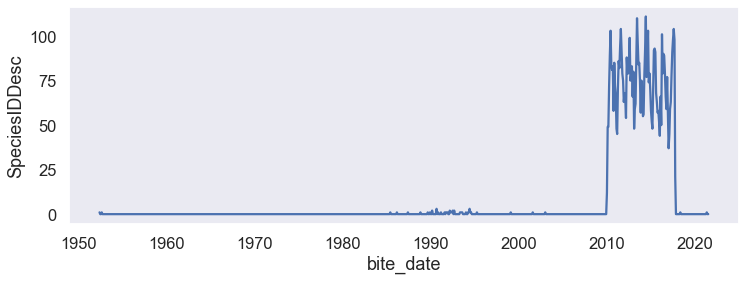

In [17]:
plt.figure(figsize=[12,4])
ax = sns.lineplot(data=bites_monthly,y='SpeciesIDDesc',x='bite_date')
ax.grid(False)
plt.show()

The data set says it includes reports from 1985 but something changed in the data in 2010.  There could have been new reporting requirements.  Let's remove them and focus on the data after 2010 which is probably more reliable.

In [18]:
bites_monthly = bites_monthly.loc["2010-01-01":]

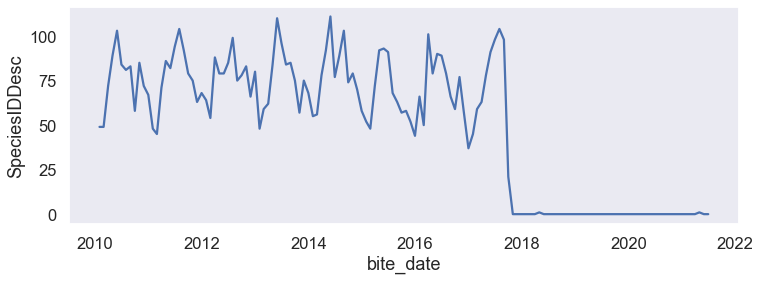

In [19]:
plt.figure(figsize=[12,4])
sns.lineplot(data=bites_monthly,y='SpeciesIDDesc',x='bite_date')
plt.show()

In [20]:
bites_monthly.tail(10)

,SpeciesIDDesc
bite_date,
2020-09-30,0
2020-10-31,0
2020-11-30,0
2020-12-31,0
2021-01-31,0
2021-02-28,0
2021-03-31,0
2021-04-30,1
2021-05-31,0


It looks like the data set does end in 2017 so we will reomve any months with 0 bite incidents

In [21]:
bites_monthly = bites_monthly.loc[:"2017-10-01"]

In [22]:
bites_monthly.tail(5)

,SpeciesIDDesc
bite_date,
2017-05-31,91
2017-06-30,98
2017-07-31,104
2017-08-31,98
2017-09-30,21


In [23]:
bites_annual = df[['SpeciesIDDesc']].resample('Y').count().loc["2010-01-01":"2017-12-31"]


bites_annual.index = bites_annual.index + pd.tseries.frequencies.to_offset((pd.Timedelta(days=-6*30)))

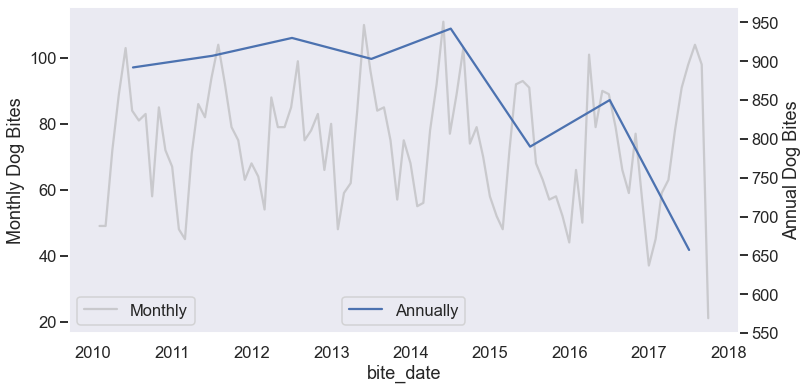

In [24]:
plt.figure(figsize=[12,6])
sns.lineplot(data=bites_monthly,y='SpeciesIDDesc',x='bite_date',color='darkgrey',alpha=.5)
plt.ylabel('Monthly Dog Bites')

plt.legend(labels=['Monthly'],loc='lower left')

ax2 = plt.twinx()
sns.lineplot(data=bites_annual,y='SpeciesIDDesc',x='bite_date',color='b',ax=ax2)
plt.legend(labels=['Annually'],loc='lower center')
plt.ylabel('Annual Dog Bites')
plt.ylim([550,970])
plt.savefig('bite trend.png')
plt.show()

The plot above is a trend of all dog bites around Louisville from 2010 to October of 2017.  The monthly trend line shows clear seasonality to the number of dog bites.  The annual trend shows a slight increase in incidents from 2010 through 2014, but then a decrease from 2015 through 2017.  

The American Pet Products Association conducts a nation wide survey to determine the number of households that have pets.

In [25]:
APPA_dogs=[[2011,46.3],[2013,56.7],[2015,54.4],[2017,60.2],[2019,63.4]]

In [26]:
bites_annual['Year']=bites_annual.index.year

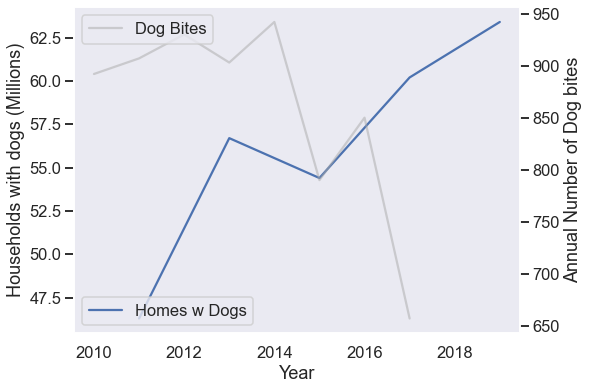

In [27]:
APPA_dogs = pd.DataFrame(APPA_dogs,columns=['Year','Households with dogs (Millions)'])

plt.figure(figsize=(8,6))
sns.lineplot(data=APPA_dogs,x='Year',y='Households with dogs (Millions)')
plt.legend(labels = ['Homes w Dogs'],loc='lower left')

ax2 = plt.twinx()
sns.lineplot(data=bites_annual,y='SpeciesIDDesc',x='Year',color='darkgrey',alpha=.5,ax=ax2)
plt.ylabel('Annual Number of Dog bites')
plt.legend(labels = ['Dog Bites'],loc='upper left')
plt.savefig('Bite rate decline.png')
plt.show()

Good news! This is a national survey, but the number of households with a dog has mostly been increasing over the last ~10 years.  Assuming that the trend in Kentucky is similar to the nationa trend, the number of dog bite incidents per dog is decreasing! That could be because dogs are becoming better trained or socialized, or their owners are better at keeping them out of stressfull situations.  Either way, good news!

Next I'd like to plot monthly data by month with different colored trend lines for each year

In [28]:
bites_monthly = bites_monthly.reset_index()
bites_monthly['Year'] = bites_monthly['bite_date'].dt.year
bites_monthly['Month'] = bites_monthly['bite_date'].dt.month

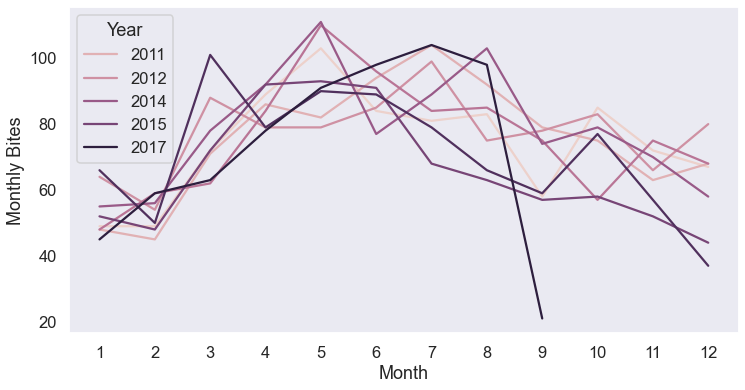

In [29]:
plt.figure(figsize=[12,6])
sns.lineplot(data=bites_monthly,x='Month',y='SpeciesIDDesc',hue='Year')
plt.ylabel('Monthly Bites')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

So clearly there is a seasonal pattern there the number of bite incidents increase in the summer time and decrease in the winter time.  

## Are dog bites concentrated in certain geographic areas?

In [30]:
df.victim_zip.nunique()

208

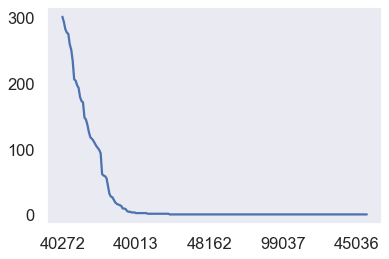

In [31]:
df.victim_zip.value_counts().plot();

There are 208 unique zip codes with a recorded dog bite from 2010 through the fall of 2017.  I will focus only on the the zip codes with that are most at risk for dog bites.  

In [32]:
pd.DataFrame(df.victim_zip.value_counts()>100).sum()

victim_zip    25
dtype: int64

There are 25 zip codes that have the more than 100 bite incidents in the data set.  I will focus on these zip codes.  

In [33]:
pd.DataFrame(df.victim_zip.value_counts()>100).index

Index(['40272', '40216', '40215', '40291', '40214', '40229', '40299', '40219',
       '40218', '40212',
       ...
       '40037', '40227', '45036', '43228', '61822', '40201', '52349', '36362',
       '40046', '46032'],
      dtype='object', length=208)

In [34]:
top_zips = list(df.victim_zip.value_counts().index[:25])
zip_bites_df = df[df['victim_zip'].isin(top_zips)].loc["2010-01-01":"2017-12-31"]

In [35]:
zip_bites_df

,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
bite_date,,,,,,,,,,,,,,
2010-01-01,DOG,NaN,FEMALE,WHT,1.0,2009-10-22,40228,NO,BODY,2010-01-04,RELEASED,NaN,NaN,UNKNOWN
2010-01-02,DOG,NaN,MALE,BLK-BRN,3.0,2008-02-07,40291,NO,HEAD,2010-01-04,RELEASED,NaN,NaN,UNKNOWN
2010-01-02,DOG,NaN,UNKNOWN,NaN,NaN,NaT,40219,YES,BODY,2010-01-04,UNKNOWN,NaN,NaN,UNKNOWN
2010-01-02,DOG,NaN,UNKNOWN,BLK,NaN,NaT,40216,NO,BODY,2010-01-04,UNKNOWN,NaN,NaN,UNKNOWN
2010-01-04,DOG,NaN,FEMALE,BLK,1.0,2010-01-15,40291,NO,BODY,2010-01-06,RELEASED,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-04,DOG,BLACK LAB,MALE,BLACK,NaN,NaT,40229,NaN,BODY,NaT,NaN,NaN,NaN,NaN
2017-09-04,DOG,NaN,NaN,NaN,NaN,NaT,40214,NaN,BODY,NaT,NaN,NaN,NaN,NaN
2017-09-06,DOG,CHICHAUHUA,FEMALE,TAN,NaN,NaT,40206,NaN,HEAD,NaT,NaN,NaN,NaN,NaN


In [36]:
zip_bites_df = zip_bites_df.groupby(by='victim_zip',axis=0,).count()[['SpeciesIDDesc']].sort_values(by='SpeciesIDDesc',ascending=False).reset_index()

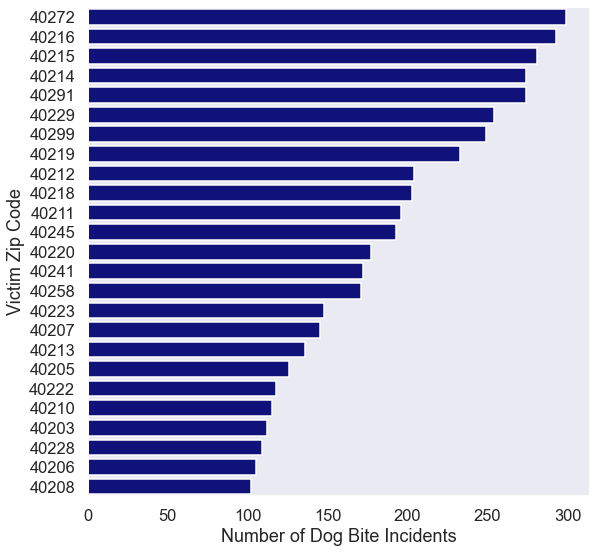

In [37]:
plt.figure(figsize=(9,9))
sns.barplot(data=zip_bites_df,y='victim_zip',x='SpeciesIDDesc',color='darkblue')
plt.ylabel('Victim Zip Code')
plt.xlabel('Number of Dog Bite Incidents')
plt.show()

In [38]:
### Filter out bad data by year
zip_bites_df = df[df['victim_zip'].isin(top_zips)].loc["2010-01-01":"2017-12-31"]
### Create Year column
zip_bites_df['Year']=zip_bites_df.index.year

### Group by Year and zip
zip_bites_df = zip_bites_df.groupby(by = ['Year','victim_zip']).count()[['SpeciesIDDesc']]
### and reset index
zip_bites_df.reset_index(inplace=True)

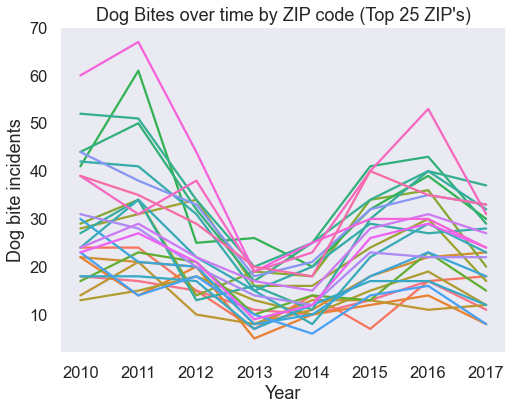

In [39]:
plt.figure(figsize=(8,6))

sns.lineplot(data=zip_bites_df,x='Year',y='SpeciesIDDesc',hue='victim_zip',legend=False)

plt.ylabel('Dog bite incidents')
plt.title("Dog Bites over time by ZIP code (Top 25 ZIP's)")
plt.show()

The chart above shows the trend of dog bites in the top 25 ZIP codes for dog bites.  Interestingly virtually all of these zip codes have a sharp decline in dog bites in years 2013 and 2014.  I wonder what happened in those years that led to the much lower dog bite rates.  

## What is the most dangerous dog you have to watch out for?

In [40]:
df['GenderIDDesc'].value_counts()

MALE       3278
FEMALE     1582
UNKNOWN     457
Name: GenderIDDesc, dtype: int64

Male dogs appear to be more likely to bite a person than female dogs.

In [41]:
df['BreedIDDesc'].value_counts()

PIT BULL           1081
GERM SHEPHERD       323
LABRADOR RETRIV     248
BOXER               181
CHICHAUHUA          164
                   ... 
RED HEELER            1
IRISH WOLFHOUND       1
AMER FOX HOUND        1
BRIARD                1
BESINJI               1
Name: BreedIDDesc, Length: 101, dtype: int64

Pitbulls appear to be the most likely breed to bite a person.  However, this could be a Simpson's paradox, so let's dig deeper by controlling for gender.  

In [42]:
df_danger =  df.loc["2010-01-01":"2017-12-31"].groupby(by=['GenderIDDesc','BreedIDDesc']).count()[['SpeciesIDDesc']]
df_danger.reset_index(inplace=True)
df_danger = df_danger.sort_values(by='SpeciesIDDesc',ascending=False)
df_danger.head(10)

,GenderIDDesc,BreedIDDesc,SpeciesIDDesc
150,MALE,PIT BULL,521
61,FEMALE,PIT BULL,283
129,MALE,GERM SHEPHERD,180
140,MALE,LABRADOR RETRIV,139
105,MALE,BOXER,98
112,MALE,CHICHAUHUA,90
44,FEMALE,GERM SHEPHERD,68
165,MALE,SHIH TZU,66
53,FEMALE,LABRADOR RETRIV,65
92,MALE,BEAGLE,60


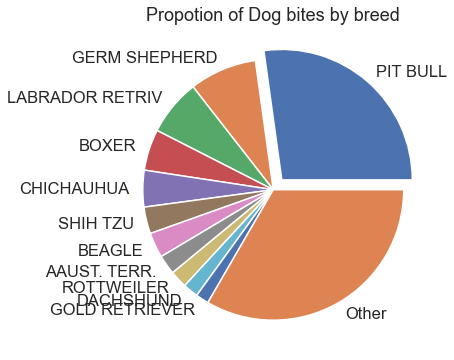

In [43]:
### For limiting the number of dog breeds in the pie chart
### only show dog breeds with number of bites greater than
limit=45

danger = df_danger.groupby('BreedIDDesc').sum()

danger = danger.reset_index().sort_values('SpeciesIDDesc',ascending=False)
top_danger = danger[danger['SpeciesIDDesc']>limit]

other = ['Other',danger[danger['SpeciesIDDesc']<=limit]['SpeciesIDDesc'].sum()]
other = pd.DataFrame([other],columns=danger.columns)
top_danger = pd.concat([top_danger,other])

explode=[.1]+[0]*(top_danger.shape[0]-1)


dogs = top_danger['SpeciesIDDesc']
labels = top_danger['BreedIDDesc']

plt.figure(figsize=(6,6))

plt.pie(dogs,labels=labels,explode=explode)
plt.title('Propotion of Dog bites by breed')
plt.savefig('BreedPie.png')
plt.show()

In [44]:
top_danger.to_csv('top_danger.csv')

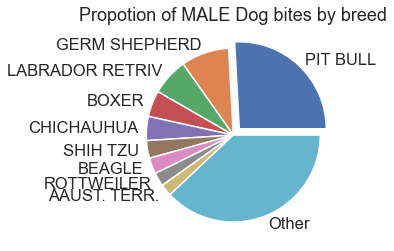

In [45]:
### For limiting the number of dog breeds in the pie chart
### only show dog breeds with number of bites greater than
limit=40
gender='MALE'
male_df=df_danger[df_danger['GenderIDDesc']==gender]
topmale_df = male_df[male_df['SpeciesIDDesc']>limit]

other = [gender,'Other',male_df[male_df['SpeciesIDDesc']<=limit]['SpeciesIDDesc'].sum()]
other = pd.DataFrame([other],columns=topmale_df.columns)
topmale_df = pd.concat([topmale_df,other])

explode=[.1]+[0]*(topmale_df.shape[0]-1)

male_dogs=topmale_df[topmale_df['GenderIDDesc']==gender]['SpeciesIDDesc']
labels=topmale_df[topmale_df['GenderIDDesc']==gender]['BreedIDDesc']
plt.pie(male_dogs,labels=labels,explode=explode)
plt.title('Propotion of '+gender+' Dog bites by breed')
plt.show()

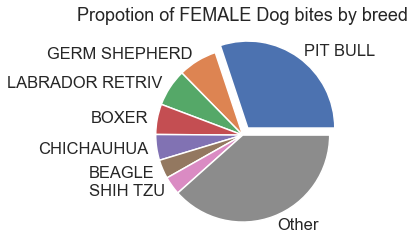

In [46]:
### For limiting the number of dog breeds in the pie chart
### only show dog breeds with number of bites greater than
limit=30
gender='FEMALE'
male_df=df_danger[df_danger['GenderIDDesc']==gender]
topmale_df = male_df[male_df['SpeciesIDDesc']>limit]

other = [gender,'Other',male_df[male_df['SpeciesIDDesc']<=limit]['SpeciesIDDesc'].sum()]
other = pd.DataFrame([other],columns=topmale_df.columns)
topmale_df = pd.concat([topmale_df,other])

explode=[.1]+[0]*(topmale_df.shape[0]-1)

male_dogs=topmale_df[topmale_df['GenderIDDesc']==gender]['SpeciesIDDesc']
labels=topmale_df[topmale_df['GenderIDDesc']==gender]['BreedIDDesc']
plt.pie(male_dogs,labels=labels,explode=explode)
plt.title('Propotion of '+gender+' Dog bites by breed')

plt.show()

The 2 pie charts above show that Pit bulls are responsible for about 25% of all dog bites by male dogs and slighlt more than 25% of dog bites be female dogs. For both sexes pit bulls are responsible for more dog bites than any other breed.  In both cases Germand Shepherds and Labrador's come in second and third place respectively.  

These may be the most common dogs in the city of Louisville.  In order to really know if pit bulls are more likely to bite than other breeds we would need detailed information on the populations of the dog breeds in these ZIP codes.  Although we cannot say pitbulls are more dangerous than other breeds,  I would excercise caution around pit bulls.  

## Chance of getting rabies after a dog bite? Chance of getting bitten in a life threatening spot on the body?

In [47]:
rabies_prob = 100 * df.ResultsIDDesc.value_counts()['POSITIVE']/df.shape[0]

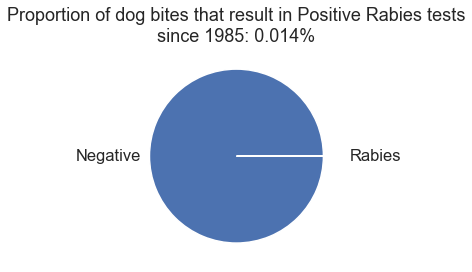

In [48]:
plt.pie([df.shape[0],df.ResultsIDDesc.value_counts()['POSITIVE']],labels=['Negative','Rabies'],explode=[0,0.2])
plt.title('Proportion of dog bites that result in Positive Rabies tests\nsince 1985: {:.3f}%'.format(rabies_prob))
plt.savefig('RabiesPie.png')
plt.show()

There is an incredibly small chance of getting rabies from a dog bite in the Louisveille area.  There has only been one positive case from a dog bite since 1985.

In [49]:
df.WhereBittenIDDesc.value_counts()/df.shape[0]

BODY       0.706247
HEAD       0.169817
UNKNOWN    0.091906
Name: WhereBittenIDDesc, dtype: float64

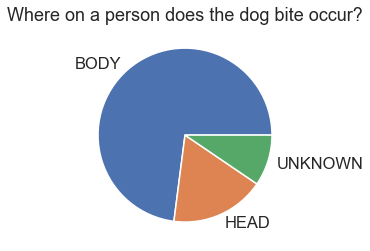

In [50]:
plt.pie(df.WhereBittenIDDesc.value_counts(),labels=df.WhereBittenIDDesc.value_counts().index)
plt.title('Where on a person does the dog bite occur?')
plt.savefig('BiteLoc.png')
plt.show()

Dog bites occur most often on the body, approximately 70% of the time.  ~17% of the time a dog bite will occur on the victims head.  I will consider these especially dangerous and dig into it further.

## Which dog breed is responsible for the most bites to a victim's head?

In [51]:
#df['WhereBittenIDDesc']=pd.Categorical(df.WhereBittenIDDesc)
#df['SpeciesIDDesc']=pd.Categorical(df.SpeciesIDDesc)
#df['BreedIDDesc']=pd.Categorical(df.BreedIDDesc)

In [52]:
df_danger = df.groupby(by=['BreedIDDesc','WhereBittenIDDesc']).count()[['SpeciesIDDesc']].sort_values('SpeciesIDDesc',ascending=False)
df_danger.reset_index(inplace=True)

In [53]:
df_danger

,BreedIDDesc,WhereBittenIDDesc,SpeciesIDDesc
0,PIT BULL,BODY,823
1,GERM SHEPHERD,BODY,253
2,LABRADOR RETRIV,BODY,143
3,PIT BULL,HEAD,140
4,BOXER,BODY,127
...,...,...,...
229,DALMATIAN,HEAD,1
230,SAINT BERNARD,HEAD,1
231,BICHON FRESE,UNKNOWN,1
232,BESINJI,BODY,1


In [54]:
df_danger = df_danger[df_danger.WhereBittenIDDesc!='UNKNOWN']

In [55]:
limit=20
total= df_danger.groupby(by=['BreedIDDesc']).sum().reset_index().sort_values('SpeciesIDDesc',ascending=False)[:limit]


headonly = df_danger[df_danger.WhereBittenIDDesc=='HEAD']

total=pd.merge(total,headonly,how='left',on='BreedIDDesc')

#unkown = df_danger[df_danger.WhereBittenIDDesc=='UNKOWN']

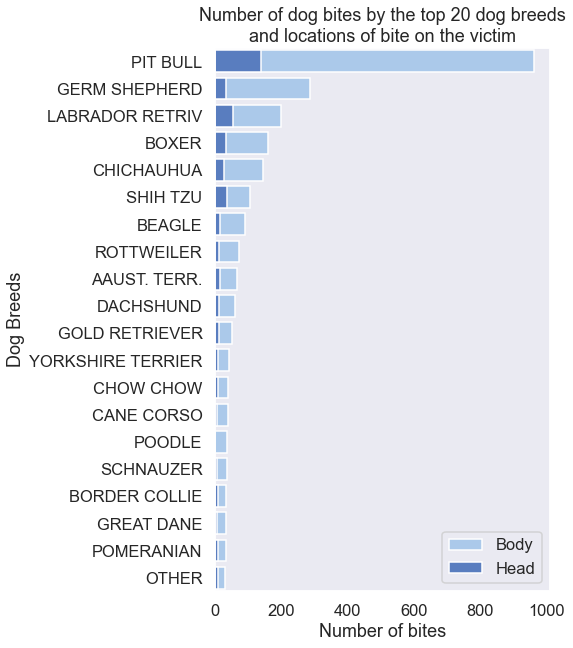

In [56]:
plt.figure(figsize=(6,10))

sns.set_color_codes('pastel')
sns.barplot(data=total, y='BreedIDDesc',x='SpeciesIDDesc_x',color='b',label='Body')

sns.set_color_codes('muted')
sns.barplot(data=total, y='BreedIDDesc',x='SpeciesIDDesc_y',color='b',label='Head')
plt.legend(loc='lower right')
plt.ylabel('Dog Breeds')
plt.xlabel('Number of bites')
plt.title('Number of dog bites by the top 20 dog breeds\nand locations of bite on the victim')
plt.savefig('BitesStackedBar.png')
plt.show()

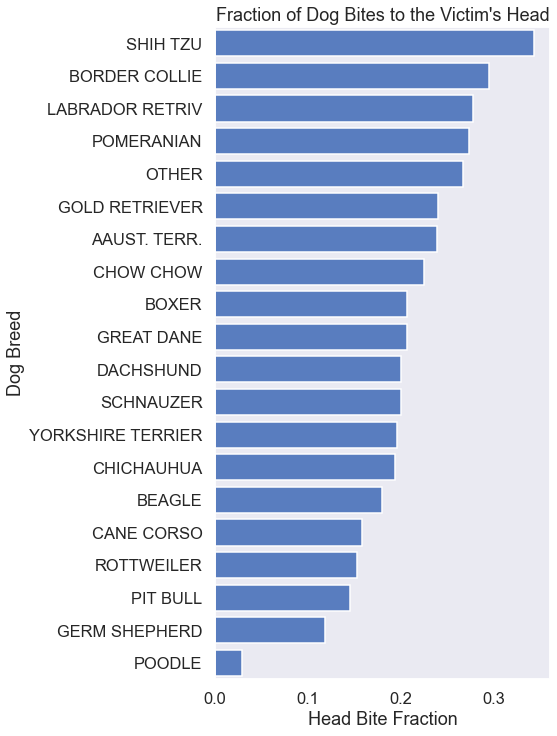

In [57]:
### Now I'll plot the fraction of bites 

total['Head Bite Rate'] = total['SpeciesIDDesc_y']/total['SpeciesIDDesc_x']
tot = total.sort_values('Head Bite Rate',ascending=False)

plt.figure(figsize=(6,12))
sns.barplot(data=tot,y='BreedIDDesc',x='Head Bite Rate',label='Head Bite Fraction',color='b')
plt.ylabel('Dog Breed')
plt.xlabel('Head Bite Fraction')
plt.title("Fraction of Dog Bites to the Victim's Head")
plt.savefig('HeadBites.png')
plt.show()